In [3]:
from pycaret.datasets import get_data
#it will load datasets from pycaret

In [ ]:
## We have used boston datasets from the getdata 

### Regression

In [13]:
boston_df=get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
from pycaret.regression import *
#It will check the performance with the all  algorithms

In [18]:
reg=setup(data=boston_df, target='medv')

,Description,Value
0,session_id,2869
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


In [19]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1923,8.7247,2.9122,0.8728,0.1407,0.1132,0.1290
et,Extra Trees Regressor,2.1372,10.0752,3.0942,0.8495,0.1355,0.1056,0.3490
lightgbm,Light Gradient Boosting Machine,2.4473,12.4438,3.3964,0.8348,0.1523,0.1214,0.0740
rf,Random Forest Regressor,2.4241,12.0276,3.3959,0.8329,0.1479,0.1189,0.4080
ada,AdaBoost Regressor,2.9769,15.7553,3.8965,0.7707,0.1756,0.1526,0.1350
dt,Decision Tree Regressor,3.4151,22.8034,4.6379,0.6819,0.2017,0.1660,0.0250
lr,Linear Regression,3.3572,23.5468,4.7223,0.6748,0.2368,0.1638,0.6270
ridge,Ridge Regression,3.3516,23.6617,4.7247,0.6748,0.2324,0.1641,0.0110
br,Bayesian Ridge,3.3481,23.9310,4.7389,0.6733,0.2276,0.1637,0.0240
en,Elastic Net,3.7172,29.4568,5.2103,0.6152,0.2435,0.1732,0.0260


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2869, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
#Create Model
reg_model=create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1092,7.3858,2.7177,0.8522,0.1376,0.1162
1,2.6524,13.9767,3.7385,0.9068,0.1247,0.0948
2,1.8016,5.8018,2.4087,0.8438,0.1400,0.1038
3,1.9831,6.2475,2.4995,0.9486,0.1615,0.1350
4,2.1547,9.1416,3.0235,0.8940,0.1339,0.1068
5,2.2933,10.2652,3.2039,0.8471,0.1415,0.1073
6,2.9310,13.6844,3.6992,0.7828,0.2364,0.1948
7,1.8547,6.5937,2.5678,0.8848,0.1021,0.0852
8,2.3449,9.1125,3.0187,0.8901,0.1172,0.1008
9,1.7979,5.0376,2.2445,0.8781,0.1118,0.0873


In [32]:
reg_model.feature_importances_

array([3.47337615e-02, 3.33549588e-04, 3.73149448e-03, 3.98368262e-02,
       3.35093001e-01, 1.21496646e-02, 9.34973774e-02, 1.25974870e-02,
       3.12651376e-02, 9.55386845e-03, 4.24230370e-01, 4.59119904e-04,
       1.94410035e-04, 3.34930471e-04, 2.30307275e-04, 5.69304425e-04,
       9.17039334e-04, 1.15241666e-04, 9.88697001e-05, 9.54350442e-06,
       4.86955080e-05])

###   Applying Hyperaparameters tuning

In [38]:
#HyperTuning
reg_model_hypert=tune_model(reg_model,n_iter=50,optimize='mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1711,9.7158,3.1170,0.8056,0.1527,0.1205
1,3.0765,26.5841,5.1560,0.8228,0.1520,0.1003
2,1.6844,5.9540,2.4401,0.8397,0.1539,0.0978
3,2.1960,10.5124,3.2423,0.9135,0.2007,0.1595
4,1.7904,5.1766,2.2752,0.9400,0.1113,0.0889
5,1.7781,7.7901,2.7911,0.8840,0.1276,0.0838
6,2.5578,10.9861,3.3145,0.8256,0.2039,0.1583
7,2.0131,12.4543,3.5291,0.7823,0.1208,0.0875
8,2.4857,9.5208,3.0856,0.8852,0.1146,0.1025
9,1.6224,4.2911,2.0715,0.8961,0.1095,0.0835


##  Analyze Model

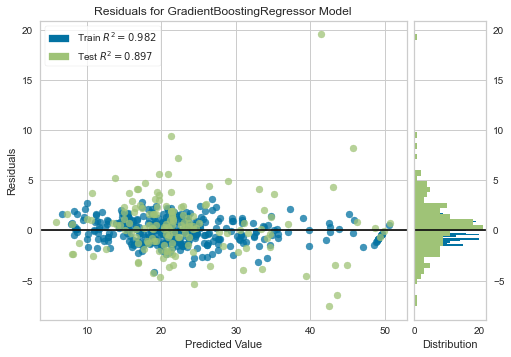

In [39]:
plot_model(reg_model)

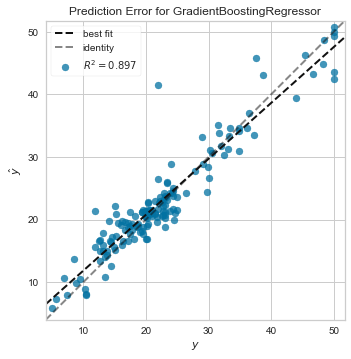

In [41]:
plot_model(reg_model, plot = 'error')

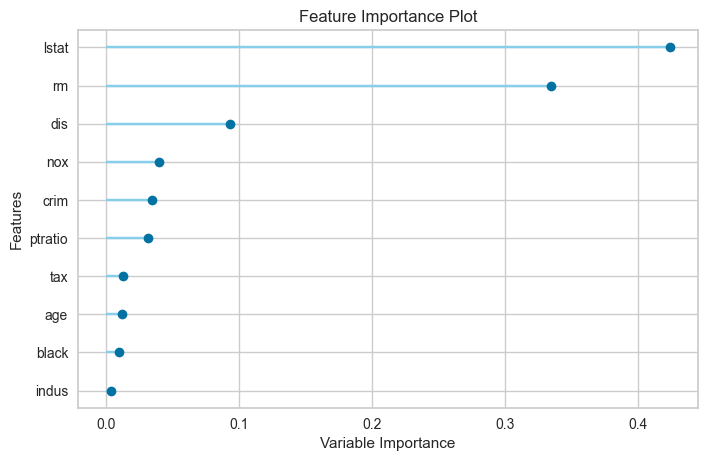

In [42]:
plot_model(reg_model, plot = 'feature')

### Auto ML

In [44]:
best = automl(optimize = 'MAE')
best

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2869, verbose=0, warm_start=False)

## Predict Model

In [43]:
pred_holdouts = predict_model(reg_model)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.1030,9.5181,3.0851,0.8966,0.1402,0.1122


,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,...,rad_2,rad_24,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,medv,Label
0,2.01019,0.0,19.58,0.605,7.929,96.199997,2.0459,403.0,14.700000,369.299988,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.000000,50.724817
1,0.03445,82.5,2.03,0.415,6.162,38.400002,6.2700,348.0,14.700000,393.769989,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.100000,24.263428
2,0.17505,0.0,5.96,0.499,5.966,30.200001,3.8473,279.0,19.200001,393.429993,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.700001,21.040503
3,3.53501,0.0,19.58,0.871,6.152,82.599998,1.7455,403.0,14.700000,88.010002,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.600000,19.450101
4,0.03551,25.0,4.86,0.426,6.167,46.700001,5.4007,281.0,19.000000,390.640015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.900000,23.256388
